In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
x=dataset.iloc[:,3:13]
print(x)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [4]:
y=dataset.iloc[:,13]
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [6]:
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)
print(gender)

      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [7]:
x=pd.concat([x,geography,gender],axis=1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
x=x.drop(['Geography','Gender'],axis=1)

In [9]:
x.head()
print(x.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Importing the Keras libraries and packages
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [13]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
# Adding the output layer
classifier.add(Dense(units=1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train, batch_size = 30, epochs = 200)


Epoch 1/200
267/267 [==============================] - 4s 6ms/step - loss: 0.5599 - accuracy: 0.7960
Epoch 2/200
267/267 [==============================] - 2s 6ms/step - loss: 0.5253 - accuracy: 0.7960
Epoch 3/200
267/267 [==============================] - 1s 6ms/step - loss: 0.5030 - accuracy: 0.7960
Epoch 4/200
267/267 [==============================] - 2s 6ms/step - loss: 0.4869 - accuracy: 0.7960
Epoch 5/200
267/267 [==============================] - 1s 6ms/step - loss: 0.4738 - accuracy: 0.7960
Epoch 6/200
267/267 [==============================] - 2s 6ms/step - loss: 0.4632 - accuracy: 0.7960
Epoch 7/200
267/267 [==============================] - 2s 6ms/step - loss: 0.4553 - accuracy: 0.7960
Epoch 8/200
267/267 [==============================] - 2s 7ms/step - loss: 0.4493 - accuracy: 0.7960
Epoch 9/200
267/267 [==============================] - 2s 7ms/step - loss: 0.4446 - accuracy: 0.7960
Epoch 10/200
267/267 [==============================] - 2s 6ms/step - loss: 0.4407 - accura

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])



ACCURACY METRIC OF ARTIFICIAL NEURAL NETWORK (KERAS)

The Confusion Matrix for the ANN Model



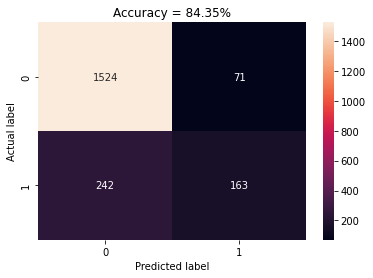

In [17]:
print("\n\nACCURACY METRIC OF ARTIFICIAL NEURAL NETWORK (KERAS)")
print("\nThe Confusion Matrix for the ANN Model\n")
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Accuracy = {0:.2f}%'.format(accuracy*100))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()